# Simple Moving Average and Exponential Moving Average 

In [5]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats

# SMA

In [24]:


start_date = '2014-01-01'
end_date = '2018-01-01'
SRC_DATA_FILENAME='goog_data.pkl'
try:
    goog_data = pd.read_pickle(SRC_DATA_FILENAME)
    print('File data found...reading GOOG data')
except FileNotFoundError:
    print('File not found...downloading the GOOG data')
    goog_data = data.DataReader('GOOG', 'yahoo', start_date, end_date)
    goog_data.to_pickle(SRC_DATA_FILENAME)
    goog_data_signal = pd.DataFrame(index=goog_data.index)
    goog_data_signal['price'] = goog_data['Adj Close']
    
# goog_data
#  in this i am saving the data for google stock in a csv file becuase I will have to use the raw data
#  for every day calculations so its better to save it on the pc

File data found...reading GOOG data


In [25]:
time_period = 20 # number of days over which to average
history = [] # to track a history of prices
sma_values = [] # to track simple moving average values

close = goog_data['Close']

for close_price in goog_data['Close']:
    history.append(close_price)
    if len(history) > time_period: 
        # we remove oldest price because we only average over last 'time_period' prices
        del (history[0])
    sma_values.append(stats.mean(history))

goog_data = goog_data.assign(ClosePrice=pd.Series(close,index=goog_data.index))
goog_data = goog_data.assign(Simple20DayMovingAverage=pd.Series(sma_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
sma = goog_data['Simple20DayMovingAverage']

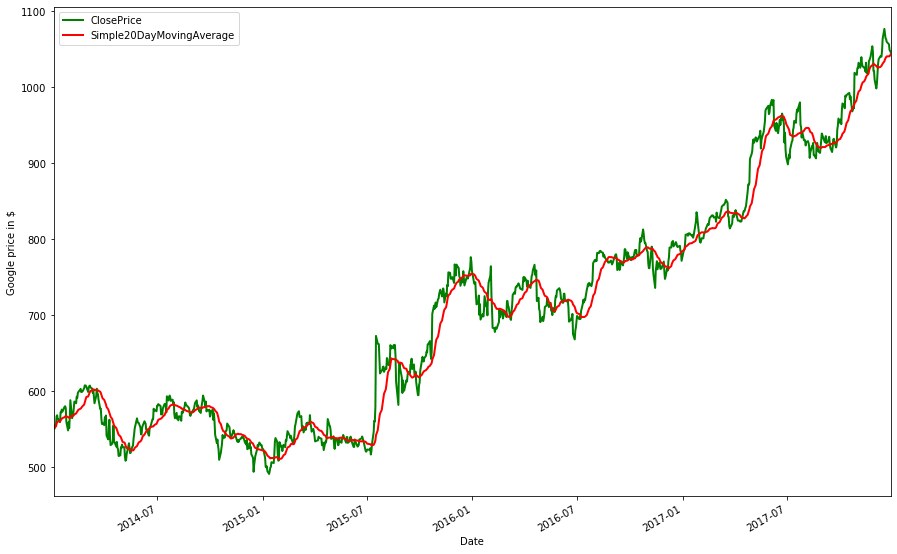

In [26]:
fig = plt.figure(figsize = (15, 10))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

This is a simple moving Average calculator and it is used to determin the strength of the momentum in various ways. For further information I have used this link https://www.investopedia.com/terms/s/sma.asp

# EMA

In [30]:
num_periods = 20 # number of days over which to average
K = 2 / (num_periods + 1) # smoothing constant
ema_p = 0
ema_values = [] # to hold computed EMA values

for close_price in close:
    if (ema_p == 0):
        # first observation, EMA = current-price
        ema_p = close_price
    else:
        ema_p = (close_price - ema_p) * K + ema_p
    ema_values.append(ema_p)
        
goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverage=pd.Series(ema_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
ema = goog_data['Exponential20DayMovingAverage']
ema

Date
2014-01-02     554.481689
2014-01-03     554.096465
2014-01-06     554.332406
2014-01-07     555.567757
2014-01-08     556.797894
                 ...     
2017-12-22    1046.004932
2017-12-26    1047.027319
2017-12-27    1047.250431
2017-12-28    1047.335153
2017-12-29    1047.246093
Name: Exponential20DayMovingAverage, Length: 1007, dtype: float64

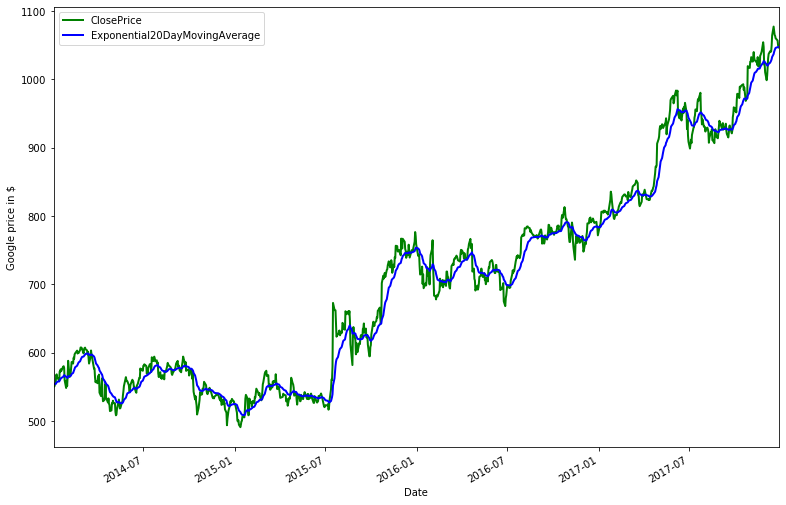

In [31]:
fig = plt.figure(figsize = (13,9))
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)
plt.savefig('ema.png')
plt.show()